In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

Shape: (460, 460, 3)
Width: 460 pixels
Height: 460 pixels
Channels: 3 pixels


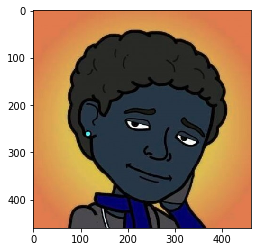

In [2]:
image =  cv2.imread("/root/openCV/bin/im_test")
original = np.array(image)

print("Shape: {}".format(image.shape))
print("Width: {} pixels".format(image.shape[1]))
print("Height: {} pixels".format(image.shape[0]))
print("Channels: {} pixels".format(image.shape[2]))

plt.imshow(image)
plt.show()

# Simple Thresholding

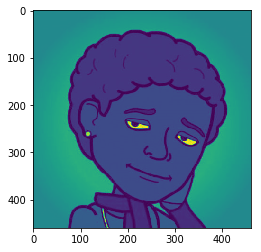

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(image)
plt.show()

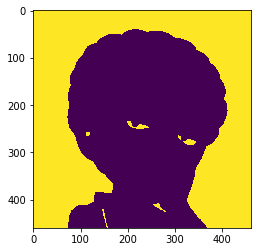

In [4]:
(T, thresh) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

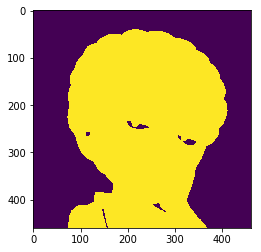

In [5]:
(T, thresh_inv) = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_inv)
plt.show()

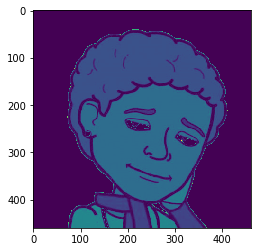

In [6]:
plt.imshow(cv2.bitwise_and(image, image, mask = thresh_inv))
plt.show()

# Adaptive Thresholding

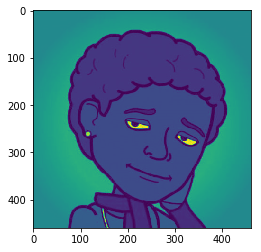

In [7]:
image = original.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(image)
plt.show()

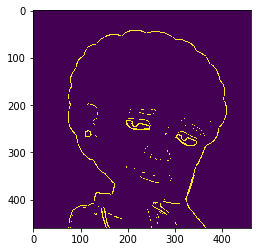

In [8]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 4)
plt.imshow(thresh)
plt.show()

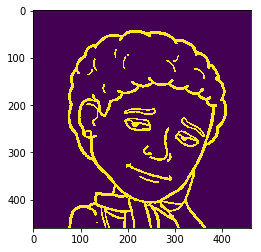

In [9]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.imshow(thresh)
plt.show()

# Ostu 

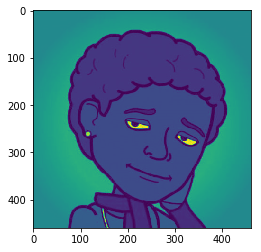

In [10]:
import mahotas 
image = np.array(original)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(image)
plt.show()

In [11]:
T = mahotas.thresholding.otsu(blurred)
print("Ostu's threshold: {}".format(T))

Ostu's threshold: 89


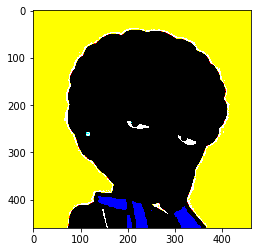

In [12]:
thresh = original.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
plt.imshow(thresh)
plt.show()

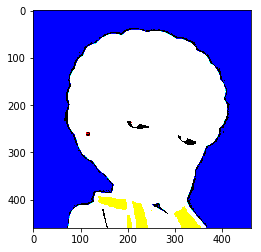

In [91]:
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh)
plt.show()

# Riddler-Calvard

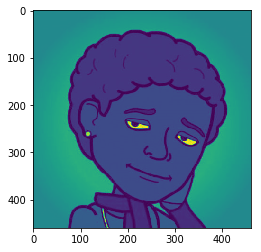

In [13]:
import mahotas 
image = np.array(original)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(image)
plt.show()

In [14]:
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard's threshold: {}".format(T))

Riddler-Calvard's threshold: 89.16176527569132


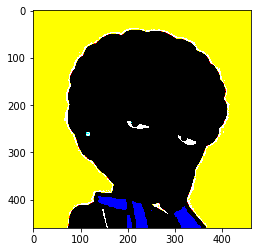

In [15]:
thresh = original.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
plt.imshow(thresh)
plt.show()

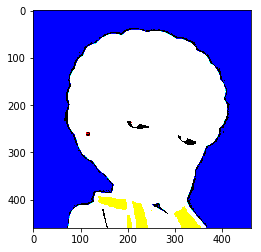

In [16]:
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh)
plt.show()